In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np


In [15]:
img=image.load_img("C:/Users/ACER/OneDrive/Desktop/Afra/Jupyter Notebook Project/Meme Classifier/Basedata/Training/Rickroll/rickroll3.jpg")

In [76]:
#plt.imshow(img)

In [21]:
#cv2.imread("C:/Users/ACER/OneDrive/Desktop/Afra/Jupyter Notebook Project/Meme Classifier/Basedata/Training/Rickroll/rickroll3.jpg").shape

(234, 353, 3)

In [23]:
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)

In [33]:
train_dataset=train.flow_from_directory('C:/Users/ACER/OneDrive/Desktop/Afra/Jupyter Notebook Project/Meme Classifier/Basedata/Training/',
                                       target_size=(200,200),
                                       batch_size=3,
                                       class_mode='binary')
validation_dataset=validation.flow_from_directory('C:/Users/ACER/OneDrive/Desktop/Afra/Jupyter Notebook Project/Meme Classifier/Basedata/Validation/',
                                       target_size=(200,200),
                                       batch_size=3,
                                       class_mode='binary')

Found 20 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [43]:
model=tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(200,200,3)),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  #
                                  tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  #
                                  tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  ##
                                  tf.keras.layers.Flatten(),
                                  ##
                                  tf.keras.layers.Dense(512,activation='relu'),
                                  ##
                                  tf.keras.layers.Dense(1,activation='sigmoid')
                                 ])
                                  

C:\Users\ACER\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [49]:
model.compile(loss='binary_crossentropy',
             optimizer=RMSprop(learning_rate=0.001),
             metrics=['accuracy'])

In [2]:
model_fit=model.fit(train_dataset,
                   steps_per_epoch=3,
                   epochs=10,
                   validation_data=validation_dataset)

NameError: name 'model' is not defined

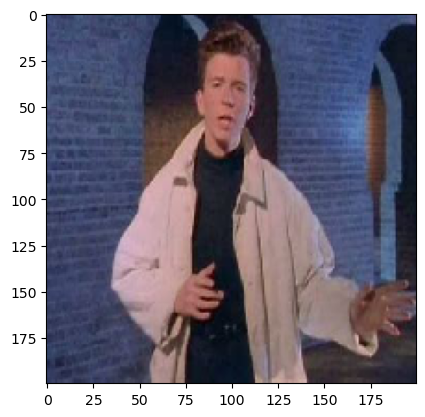

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Rickroll meme


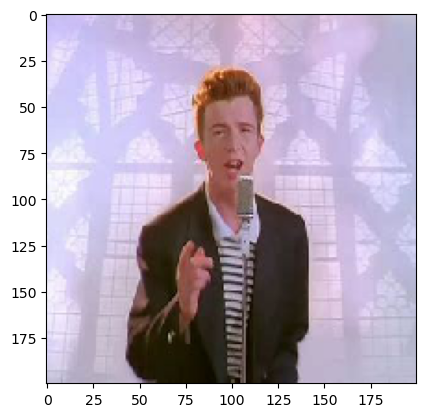

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Rickroll meme


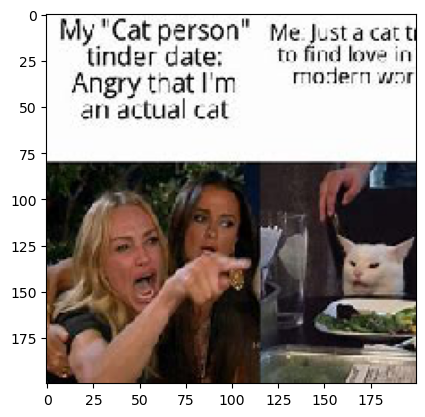

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Women and cat yelling meme


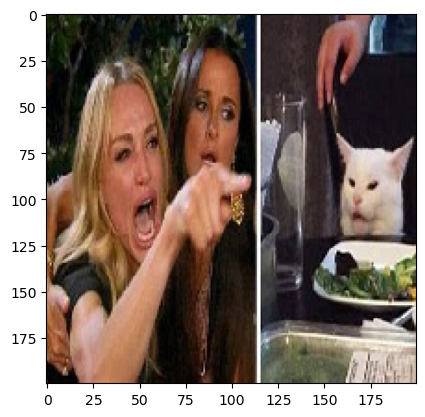

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Women and cat yelling meme


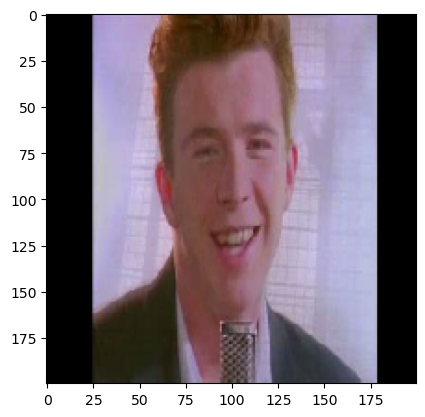

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Rickroll meme


In [78]:
dir_path='C:/Users/ACER/OneDrive/Desktop/Afra/Jupyter Notebook Project/Meme Classifier/Basedata/Testing'
for i in os.listdir(dir_path):
    img=image.load_img(dir_path+'//'+i,target_size=(200,200))
    plt.imshow(img)
    plt.show()


    X=image.img_to_array(img)
    X=np.expand_dims(X,axis=0)
    images=np.vstack([X])

    val=model.predict(images)
    if val==0:
        print("Rickroll meme")
    else:
        print("Women and cat yelling meme")

